# FIRES Tutorial: FRB 191001 Simulations

This notebook reproduces the simulations and plots from the shell script [paper/191001/make_lvpa.sh](paper/191001/make_lvpa.sh) using the `fires` command-line tool.

You can run each section independently to see how noise, scintillation, and intrinsic PA scatter affect the results.

This same notebook can be similarly run for FRB 20240318A under [paper/240318A](paper/240318A/)

## 1. Prerequisites

- FIRES installed and the `fires` command available on your PATH.
- This repository cloned locally.
- Configuration files for FRB 191001 present in:
  - `paper/191001/gparams.toml`
  - `paper/191001/simparams.toml`
  - `paper/191001/scparams.toml`
  - `paper/191001/plotparams.toml`

By default this notebook assumes the repo lives at `~/Documents/GitHub/FIRES`. Edit the paths below if your layout is different.

In [33]:
from pathlib import Path

# Adjust this if your repo is in a different location
REPO_ROOT = Path("~/Documents/GitHub/FIRES").expanduser()
CONFIG_DIR = REPO_ROOT / "paper" / "191001"
OUTPUT_DIR = CONFIG_DIR  # same as in make_lvpa.sh

CONFIG_DIR, OUTPUT_DIR

(PosixPath('/home/joel/Documents/GitHub/FIRES/paper/191001'),
 PosixPath('/home/joel/Documents/GitHub/FIRES/paper/191001'))

## 2. Check FIRES installation

The cell below prints the top of the `fires --help` output to confirm the CLI is available.

In [34]:
!fires --help | head -n 40

usage: fires [-h] [--config-dir CONFIG_DIR] [--init-config]
             [--edit-config {gparams,simparams,scparams,plotparams}] [-f] [-d]
             [-o] [--write] [-v] [-m] [--seed] [--nseed] [--ncpu] [--sefd]
             [--snr] [--scint] [--chi2-fit]
             [--override-param PARAM=VALUE [PARAM=VALUE ...]] [-b]
             [--phase-window] [--freq-window] [--buffer] [-p  [...]]
             [--plot-config] [--override-plot PARAM=VALUE [PARAM=VALUE ...]]
             [--logstep LOGSTEP] [--sweep-mode]
             [--compare-windows FREQ:PHASE [FREQ:PHASE ...]] [--obs-data]
             [--obs-params]

FIRES: The Fast, Intense Radio Emission Simulator. Simulate Fast Radio Bursts (FRBs) with scattering and polarisation effects

options:
  -h, --help            show this help message and exit
  --config-dir CONFIG_DIR
                        Override user config dir (default: ~/.config/fires)
  --init-config         Create user config from packaged defaults
  --edit-config {g

## 3. LVPA simulations (L, V, PA vs time)

These cells reproduce the three `-p lvpa` commands from the script:

1. Noisy + scintillated scattered pulse (`191001`).
2. Scattered + scintillated but no instrumental noise (`191001_nn`).
3. Intrinsic (no scattering, no scintillation, no noise) (`191001_nn_ns`).

### 3.1 LVPA: noisy + scintillated scattered pulse (`191001`)

- `-f 191001`: identifier used in filenames.
- `-p lvpa`: generate LVPA plots.
- `--sefd 1.2`: add instrumental noise.
- `--scint`: enable scintillation using `scparams.toml`.
- `--override-param "tau=1.78"`: set the scattering timescale.
- `--seed 3`: use a fixed random seed for reproducibility.

[DEBUG] FIRES: Verbose logging enabled.
DEBUG:FIRES:Verbose logging enabled.
INFO:root:Output directory: '/home/joel/Documents/GitHub/FIRES/paper/191001' 

INFO:root:Parameter mean overrides: {'tau': 1.78}
INFO:root:Override applied: tau = 1.78 (shape: (1,))
INFO:root:Applying scintillation: t_s=300.0s, nu_s=1500000.0Hz, N_im=5000, th_lim=3.0
INFO:root:[stokes_ts:pre-noise] R=I^2-P^2: med=133, p16=27, p84=634, mean=284, frac(R<0)=0.000%
INFO:root:[stokes_ts:pre-noise] p=sqrt(Q^2+U^2+V^2)/I: median=0.582, mean=0.583, p95=0.594 

INFO:root:Added noise with SEFD=1.2 Jy
INFO:root:Stokes I S/N (on-pulse method): 196.11
INFO:root:[stokes_ts:post-noise] R=I^2-P^2: med=311, p16=102, p84=788, mean=409, frac(R<0)=1.742%
INFO:root:[stokes_ts:post-noise] p=sqrt(Q^2+U^2+V^2)/I: median=0.583, mean=0.602, p95=0.845 

tau=1.78:Expected(detailed)=11.69, Expected(basic)=0.06
Simulation completed. 

INFO:root:Var(psi) [total]: 16.593 deg^2  | L/I=0.578  V/I=-0.038
DEBUG:root:
On-pulse window: [182 , 639]

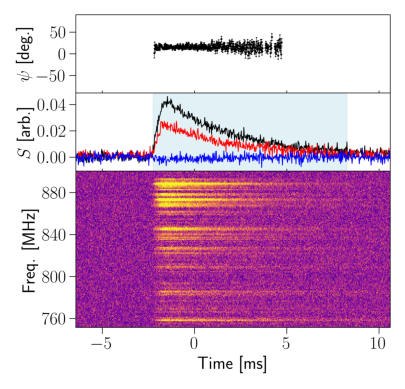

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

name = "191001"
tau = 1.78

!fires -f {name} -p lvpa --ncpu 12 \
  --config-dir {CONFIG_DIR} --verbose --seed 3 --sefd 1.2 --scint \
  --override-param "tau={tau}"\
  -o {OUTPUT_DIR}

img = mpimg.imread(f"{OUTPUT_DIR}/{name}_t_{tau}_ILVPA.png")
plt.axis('off')
plt.imshow(img)


### 3.2 LVPA: scattered + scintillated, no instrumental noise (`191001_nn`)

Same as above but without `--sefd`, so there is no additional instrumental noise, only scattering + scintillation.

INFO:root:Output directory: '/home/joel/Documents/GitHub/FIRES/paper/191001' 

INFO:root:Parameter mean overrides: {'tau': 1.78}
INFO:root:Override applied: tau = 1.78 (shape: (1,))
INFO:root:Applying scintillation: t_s=300.0s, nu_s=1500000.0Hz, N_im=5000, th_lim=3.0
INFO:root:[stokes_ts:pre-noise] R=I^2-P^2: med=133, p16=27, p84=634, mean=284, frac(R<0)=0.000%
INFO:root:[stokes_ts:pre-noise] p=sqrt(Q^2+U^2+V^2)/I: median=0.582, mean=0.583, p95=0.594 

tau=1.78:Expected(detailed)=11.69, Expected(basic)=0.06
Simulation completed. 

INFO:root:Var(psi) [total]: 0.529 deg^2  | L/I=0.582  V/I=-0.050
Figure(700x700)
INFO:root:Saved figure to /home/joel/Documents/GitHub/FIRES/paper/191001/191001_nn_t_1.78_ILVPA.png 



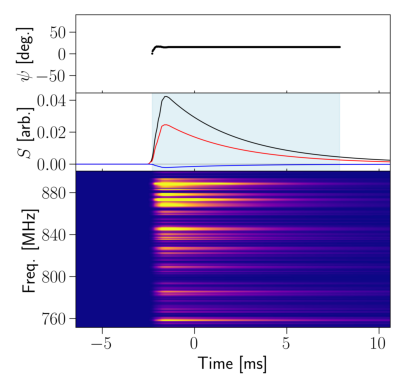

In [36]:
name = "191001_nn"

!fires -f {name} -p lvpa --ncpu 12 \
  --config-dir {CONFIG_DIR} --seed 3 --scint \
  --override-param "tau={tau}" \
  -o {OUTPUT_DIR}

img = mpimg.imread(f"{OUTPUT_DIR}/{name}_t_{tau}_ILVPA.png")
plt.axis('off')
plt.imshow(img)

### 3.3 LVPA: intrinsic only, no scattering, no scintillation, no noise (`191001_nn_ns`)

- `tau=0`: disable scattering.
- No `--sefd`, no `--scint`: purely intrinsic model with no added noise or scintillation.

INFO:root:Output directory: '/home/joel/Documents/GitHub/FIRES/paper/191001' 

INFO:root:Parameter mean overrides: {'tau': 0.0}
INFO:root:Override applied: tau = 0.0 (shape: (1,))
INFO:root:[stokes_ts:pre-noise] R=I^2-P^2: med=3.29e+04, p16=7.58e+03, p84=7.14e+04, mean=3.84e+04, frac(R<0)=0.000%
INFO:root:[stokes_ts:pre-noise] p=sqrt(Q^2+U^2+V^2)/I: median=0.635, mean=0.623, p95=0.795 

tau=0.00:Expected(detailed)=82.88, Expected(basic)=63.00
Simulation completed. 

INFO:root:Var(psi) [total]: 58.838 deg^2  | L/I=0.618  V/I=-0.050
Figure(700x700)
INFO:root:Saved figure to /home/joel/Documents/GitHub/FIRES/paper/191001/191001_nn_ns_t_0.0_ILVPA.png 



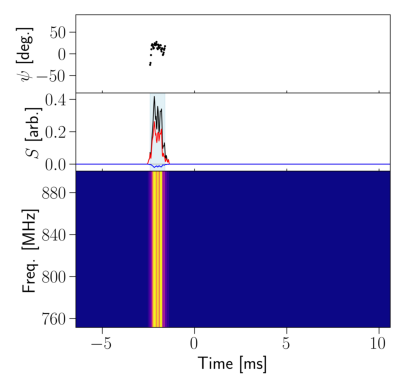

In [37]:
name = "191001_nn_ns"
tau = 0.0

!fires -f {name} -p lvpa --ncpu 12 \
  --config-dir {CONFIG_DIR} --seed 3 \
  --override-param "tau={tau}" \
  -o {OUTPUT_DIR}

img = mpimg.imread(f"{OUTPUT_DIR}/{name}_t_{tau}_ILVPA.png")
plt.axis('off')
plt.imshow(img)

## 4. Plot configuration and outputs

The plot appearance and behaviour are controlled by `plotparams.toml` in the same directory:

- `save_plots = true` means figures are saved to `OUTPUT_DIR`.
- `show_plots = true` makes figures display interactively.
- `extension = "pdf"` saves plots as PDF.

All runs in this notebook therefore write their data and plots into:

- `{OUTPUT_DIR}`

You can modify `plotparams.toml` or pass additional options via `--override-plot` on the `fires` command line to customise the styling.